In [1]:
# librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#
import src.functions as f


In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")


#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 


In [3]:
# create model
mlr_model = LinearRegression()

# fit the model
mlr_model.fit(df_train_x, df_train_y)

# make predictions
y_pred = mlr_model.predict(df_test_x)


In [4]:
# Evaluate the model
mse = mean_squared_error(df_test_y, y_pred)
mae = mean_absolute_error(df_test_y, y_pred)
mape = f.mean_absolute_percentage_error(df_test_y, y_pred)  
r2 = r2_score(df_test_y, y_pred)          

# results
print("Model coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)
print("MSE (Mean Squared Error):", mse)
print("MAE (Mean Absolute Error):", mae)
print("MAPE (Mean Absolute Percentage Error):", mape, "%")
print("Determination coefficient (R²):", r2)

Model coefficients: [ 2.86286943e+06  1.41589574e+01  1.48992337e+03  1.49802818e+03
  1.58458344e+03 -1.22701801e+01  1.36368386e+02  5.74453366e+00
 -2.00944131e+01  8.64159293e+01  6.65384225e+01 -1.20115065e+01
 -1.52627846e+01  3.19398893e+01  1.18222371e-01 -4.52101505e+00]
Intercept: 4994345.8486750005
MSE (Mean Squared Error): 3431211.254257964
MAE (Mean Absolute Error): 1433.7099397580027
MAPE (Mean Absolute Percentage Error): 0.11493907107901534 %
Determination coefficient (R²): 0.99999960149123


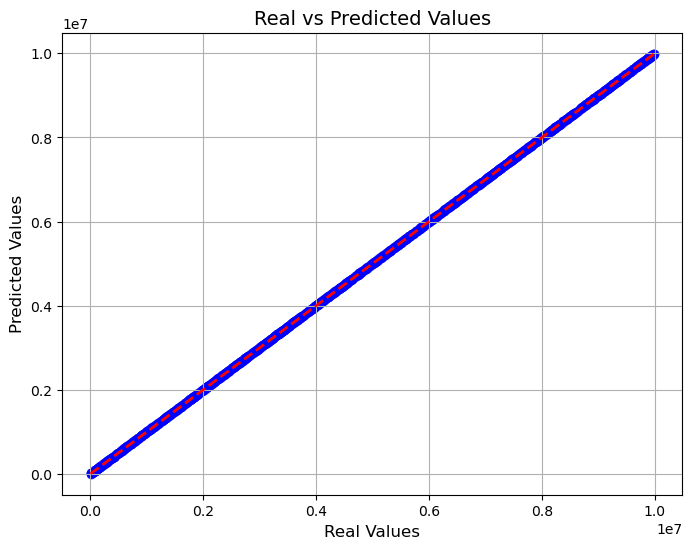

In [ ]:
# Predictions vs real values plot
plt.figure(figsize=(8, 6))
plt.scatter(df_test_y, y_pred, color='blue', alpha=0.5)
plt.plot([df_test_y.min(), df_test_y.max()], [df_test_y.min(), df_test_y.max()], 'r--', lw=2)  # Línea de igualdad

plt.title('Real vs Predicted Values', fontsize=14)
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)

plt.show()

#### **Model Coefficients**
- Each coefficient represents the weight of a feature in predicting the target variable (`price`).

#### **Model Evaluation**
- **MSE (Mean Squared Error):** `3431211.254257964`
  - Represents the average squared error between predicted and actual prices. Smaller values indicate better performance.
- **MAE (Mean Absolute Error):** `1433.7099397580`
  - Measures the average absolute error. On average, predictions deviate by ~1435 units from actual prices.
- **MAPE (Mean Absolute Percentage Error):** ` 0.1149390%`
  - Indicates the percentage error. The model is very accurate, with predictions deviating by only ~0.11% on average.
- **R² (Determination Coefficient):** `0.9999996012274278`
  - Almost perfect fit, meaning the model explains ~100% of the variance in the data.
